In [1]:
# is this a bird?

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# some duck duck go search stuff

from duckduckgo_search import DDGS
from fastcore.all import *

# Using lite backend and limit the number of results
from itertools import islice

ddgs = DDGS()

def search_images(term, max_images = 30):
    print(f"searching for '{term}'")
    keywords = term
    ddgs_images = ddgs.images(keywords)
    limited_images = list(islice(ddgs_images, max_images))
    return L(limited_images).itemgot('image')

In [3]:
urls = search_images('bird photos', max_images=1)
urls[0]

searching for 'bird photos'


'https://images.alphacoders.com/492/492674.jpg'

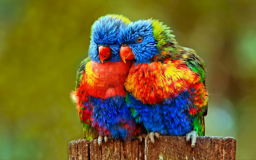

In [4]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

searching for 'forest photos'


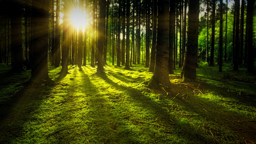

In [5]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [7]:
searches = 'forest','bird'
path = Path('images')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

searching for 'forest photo'
searching for 'forest sun photo'
searching for 'forest shade photo'
searching for 'bird photo'
searching for 'bird sun photo'
searching for 'bird shade photo'


In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

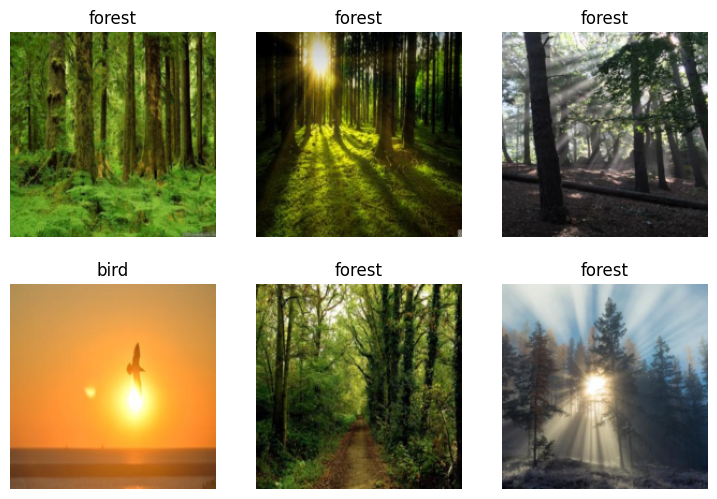

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/tylerobriant/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:01<00:00, 41.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.583774,0.012145,0.010753,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.033362,0.010119,0.010753,00:03
1,0.022967,0.002520,0.000000,00:02
2,0.015109,0.001697,0.000000,00:02


In [12]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9999
